<h1 style="color:#00a5a5">MACHINE LEARNING MODEL TO PREDICT THE LOAN STATUS OF THE APPLICANT</h1>

In [2]:
#Importing the necessary libraries

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings(action='ignore')

<h2 style="color:#56a54d">Importing the Dataset and storing it in a dataframe</h2>

In [7]:
df = pd.read_csv('loan_prediction.csv')
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

<h2 style='color:#aa557f'>EXPLORATORY DATA ANALYSIS</h2>

In [8]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#There are some null values present in almost every column with null values adding upto 10% of every column

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [14]:
df.duplicated().sum()

0

In [15]:
#There are no duplicate values present in the dataset

<h2 style="color:#aa55ff">DATA VISUALIZATION</h2>

<Axes: xlabel='Loan_Status', ylabel='count'>

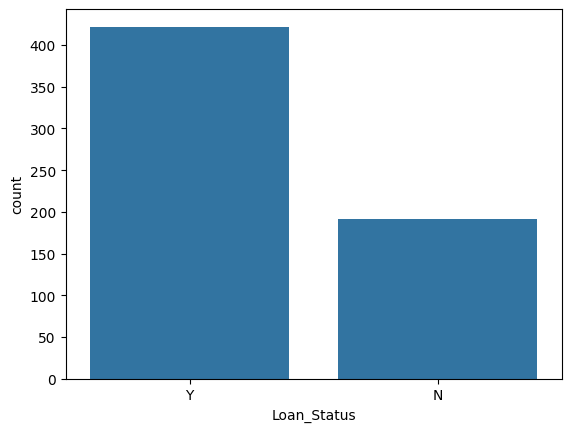

In [16]:
sns.countplot(data=df, x='Loan_Status')

In [17]:
#Its a fairly balanced dataset

<Axes: xlabel='Education', ylabel='count'>

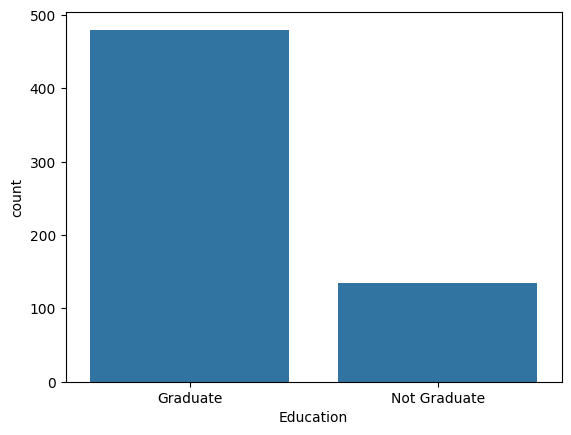

In [18]:
sns.countplot(data=df, x='Education')

<Axes: xlabel='Gender', ylabel='count'>

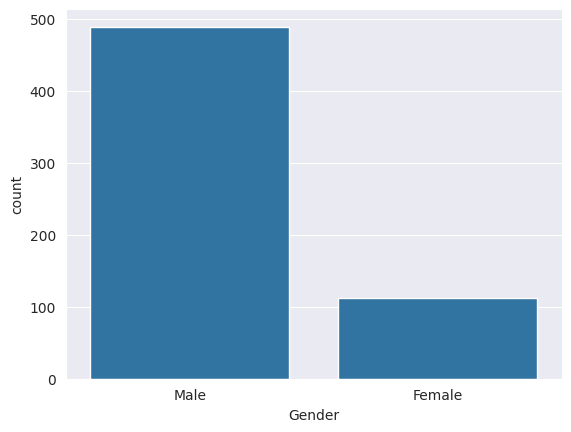

In [19]:
sns.set_style('darkgrid')
sns.countplot(data=df, x='Gender')

In [20]:
#There are 5times male applicants then female applicants

<Axes: xlabel='Dependents', ylabel='count'>

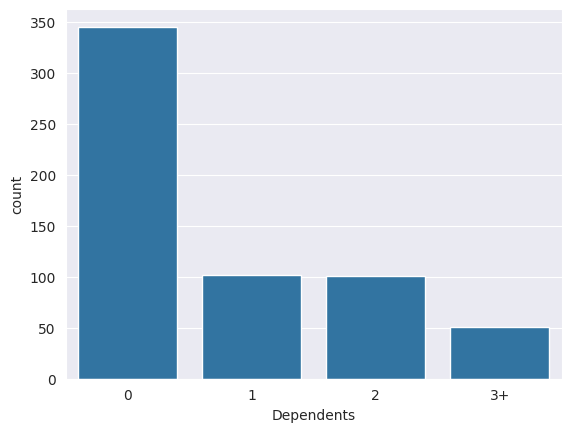

In [21]:
sns.countplot(data=df, x='Dependents')

<Axes: xlabel='Married', ylabel='count'>

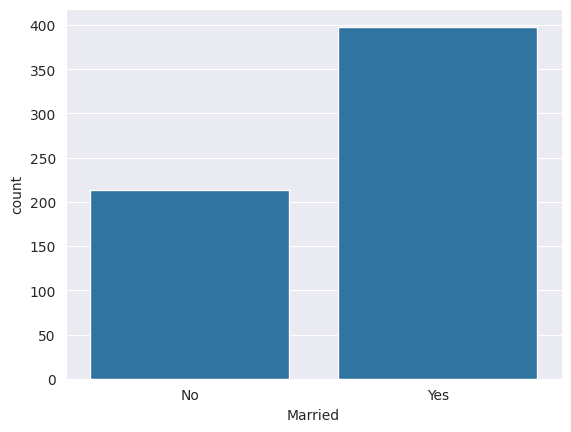

In [22]:
sns.countplot(data=df, x='Married')

In [23]:
import plotly.express as px

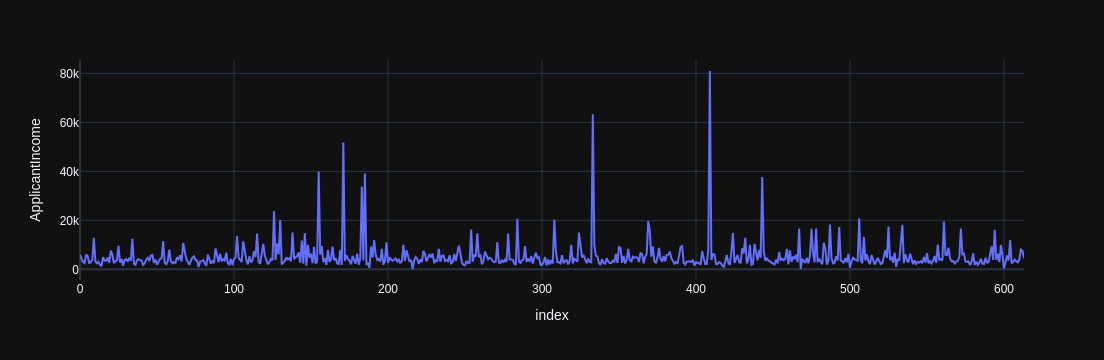

In [24]:
px.line(data_frame=df, y='ApplicantIncome',template='plotly_dark')

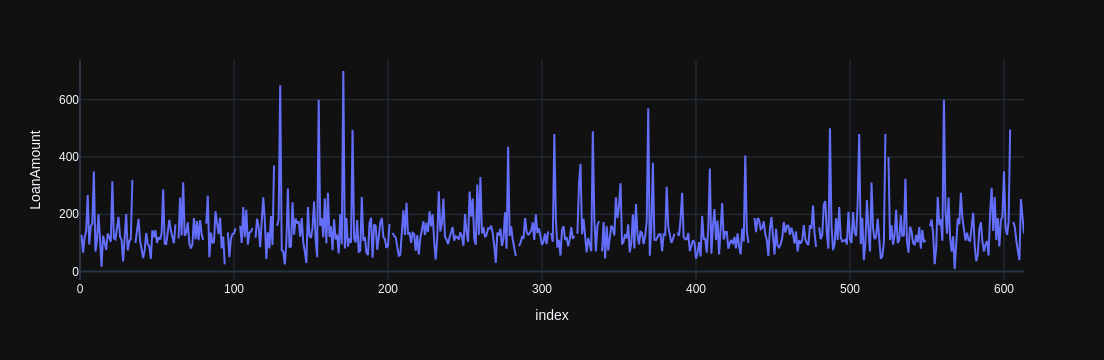

In [25]:
px.line(data_frame=df, y='LoanAmount', template='plotly_dark')

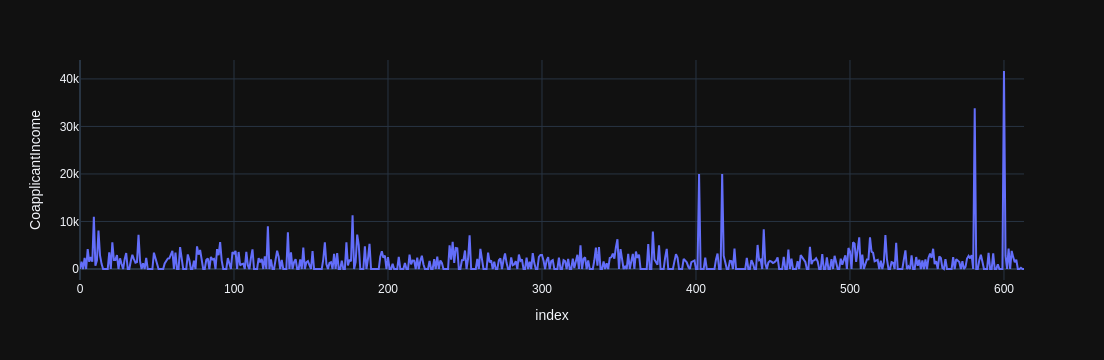

In [26]:
px.line(data_frame=df, y='CoapplicantIncome', template='plotly_dark')

<p style="font-size:120%;color:#4952ff">We can see that coapplicant income is very less as compared to Applicant's income</p>

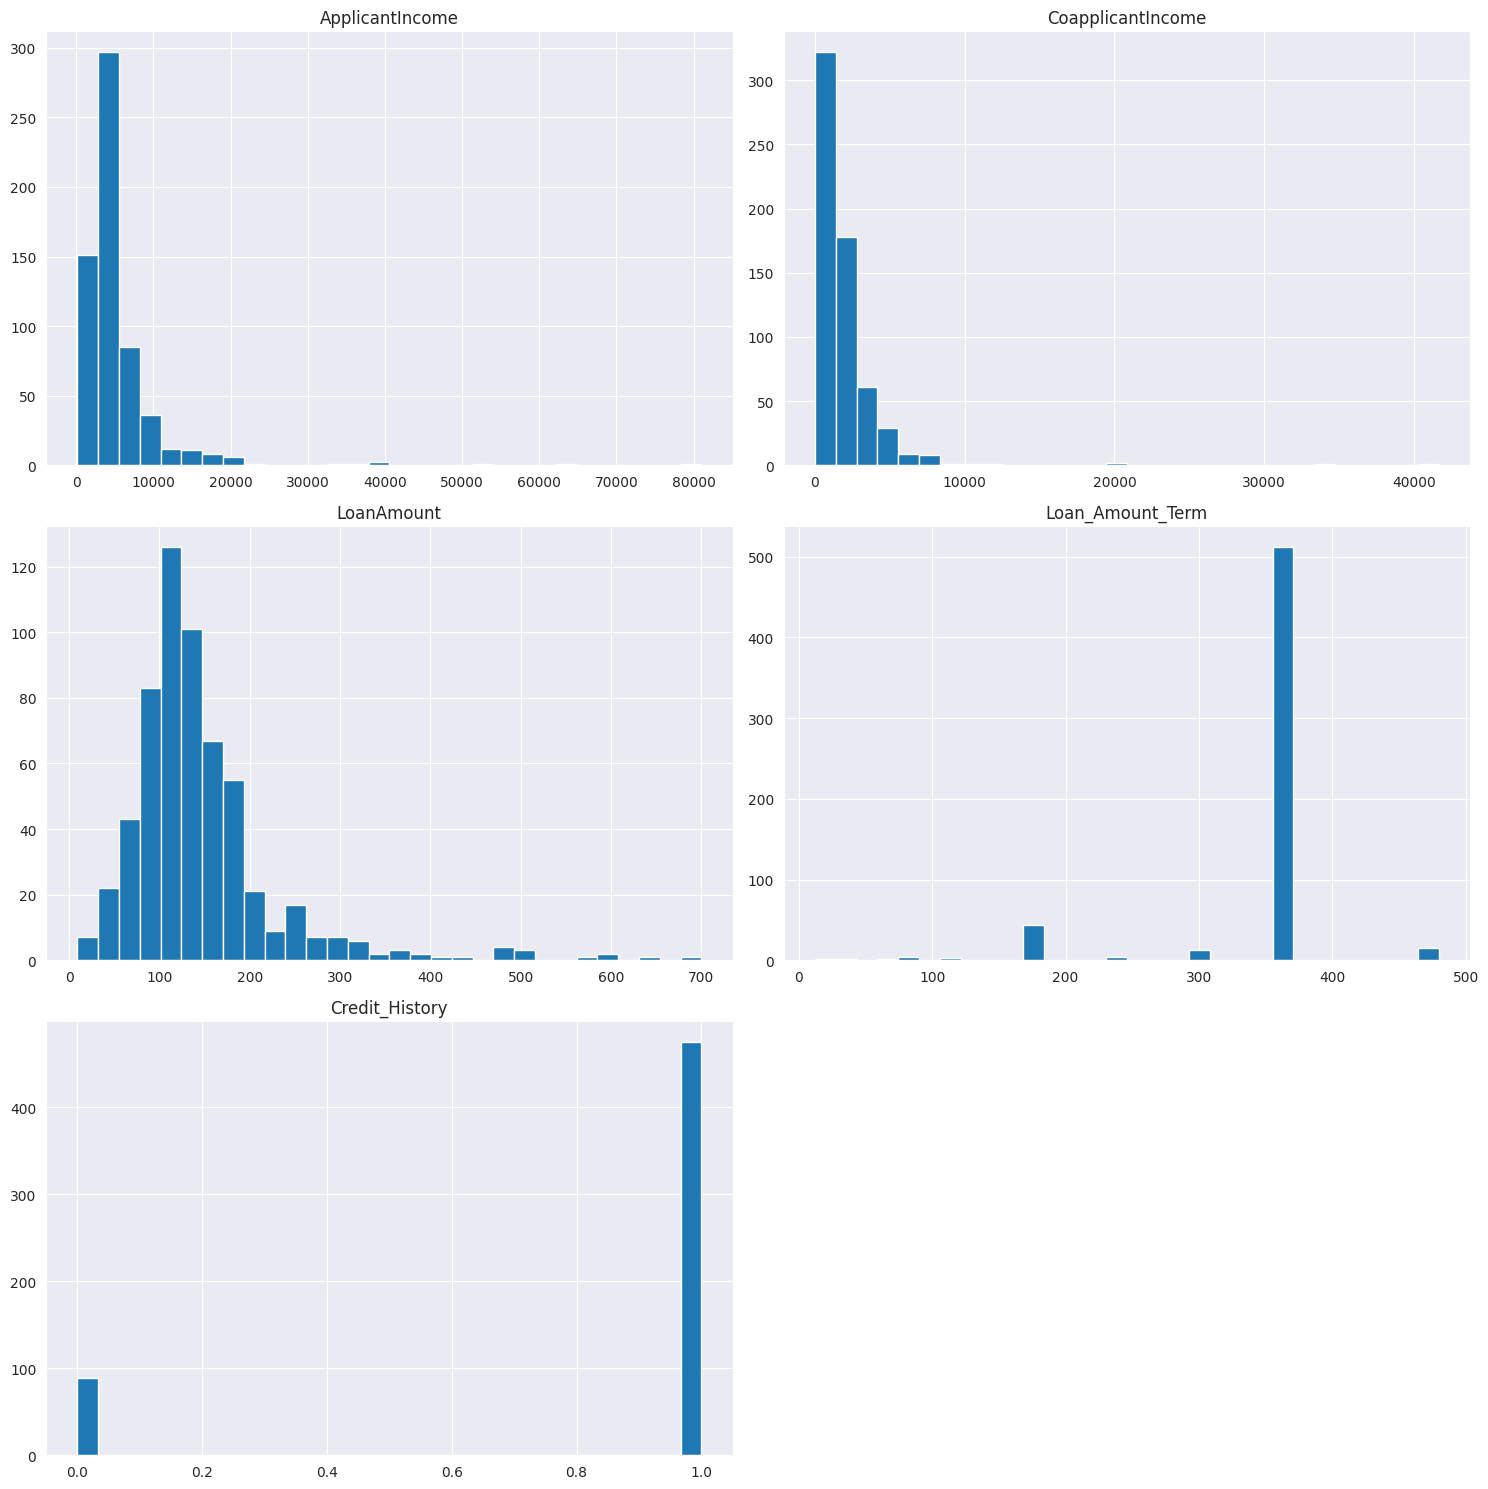

In [27]:
df.hist(bins=30, figsize=(15,15))
plt.tight_layout()

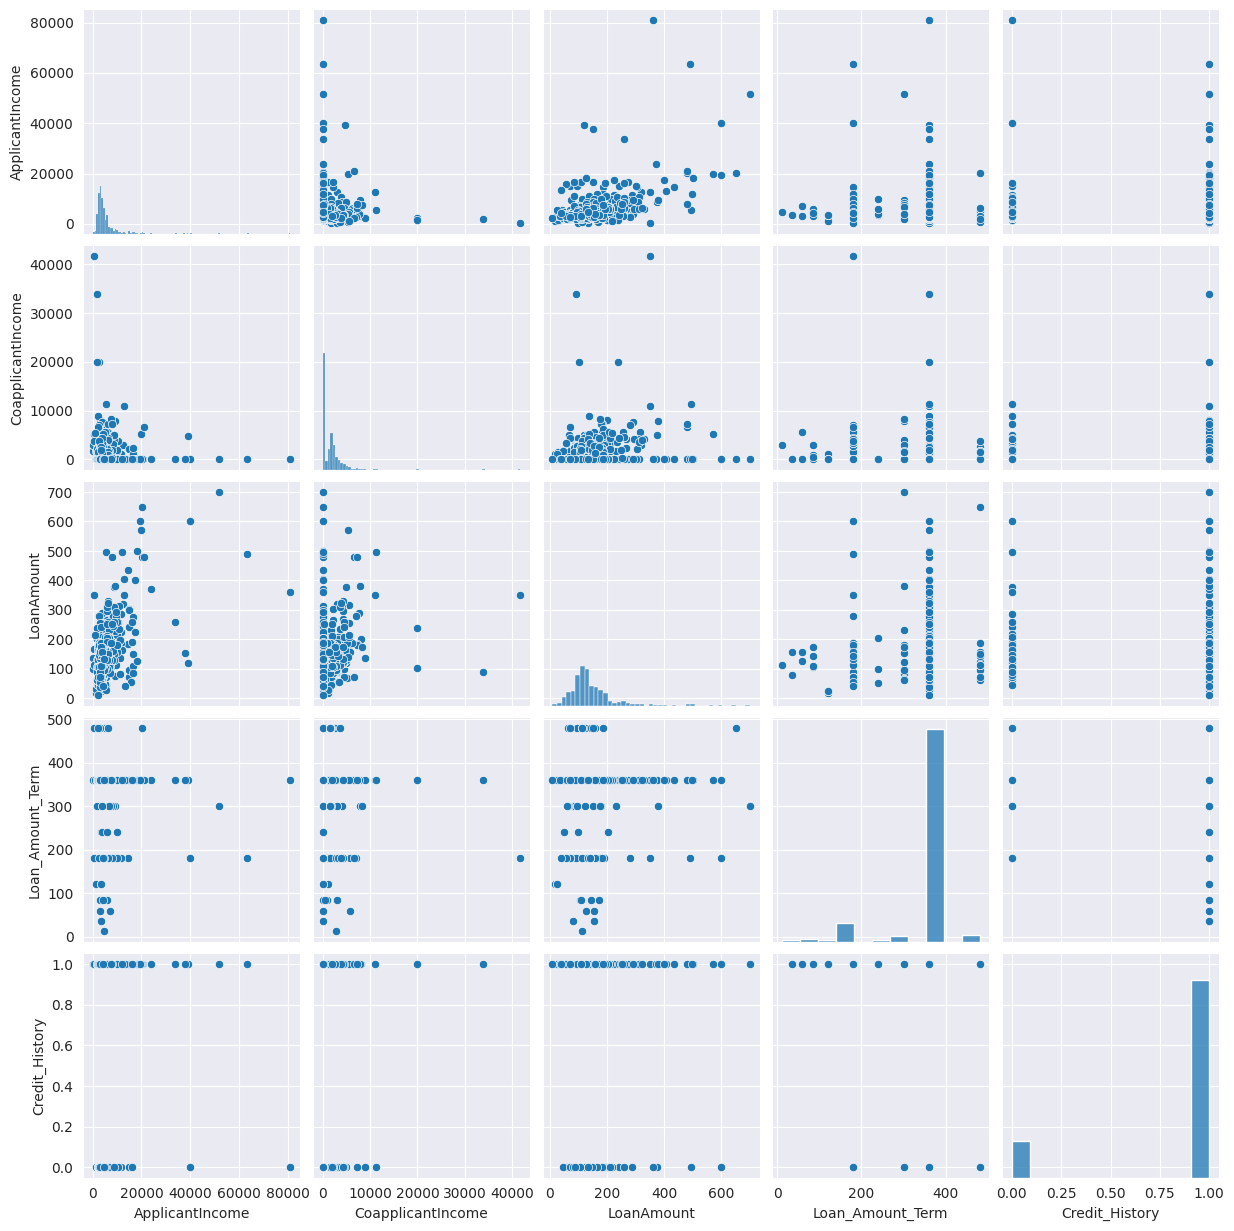

In [28]:
sns.pairplot(data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

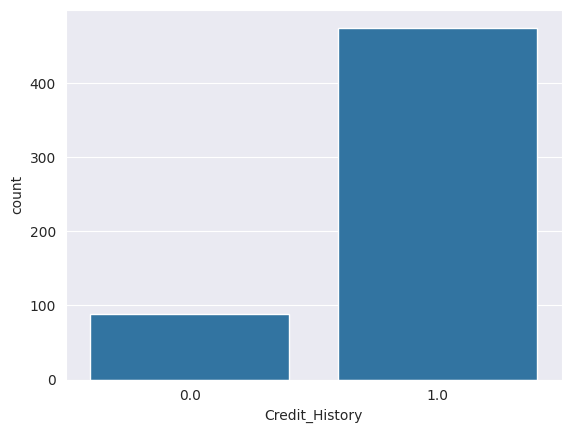

In [29]:
sns.countplot(data=df, x='Credit_History')

In [30]:
#Some people don't have a good credit history means they encountered some problem while repaying loans

In [31]:
df.corr(numeric_only=True)

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000

<Axes: >

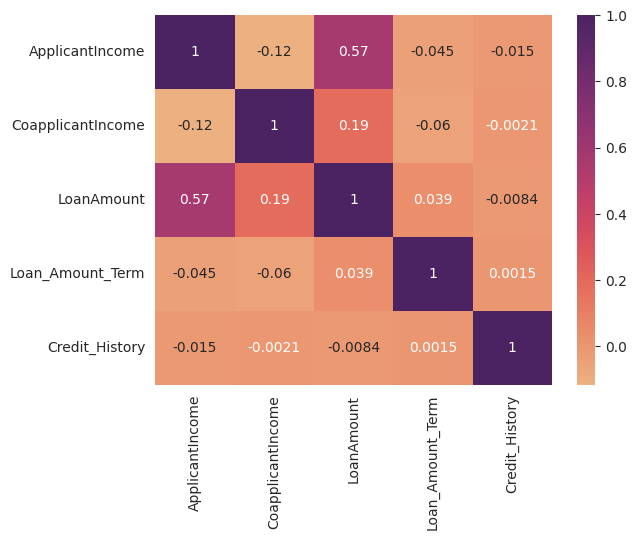

In [32]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='flare')

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

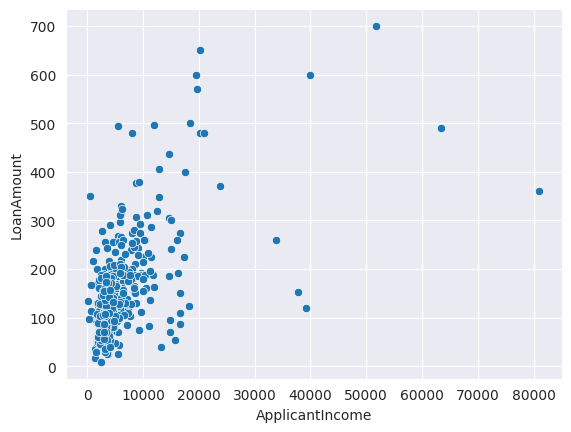

In [33]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount',)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

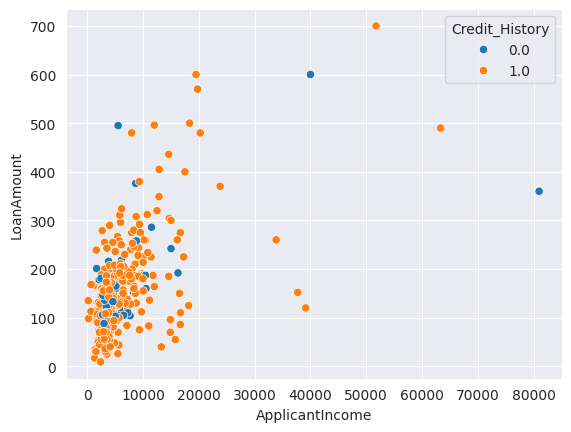

In [34]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Credit_History')

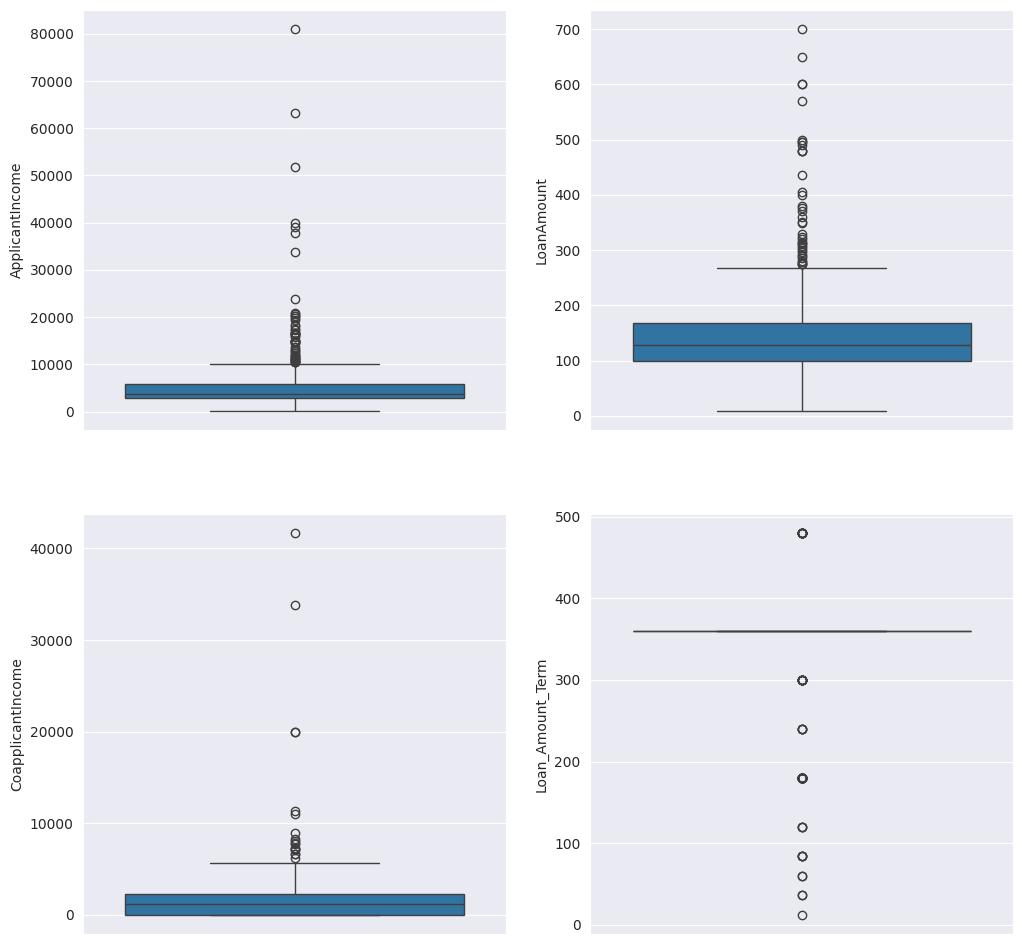

In [35]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
pltnumber = 1
for x in df[['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome' , 'Loan_Amount_Term']]:
    ax = plt.subplot(2,2,pltnumber)
    sns.boxplot(data=df, y=x)
    pltnumber+=1

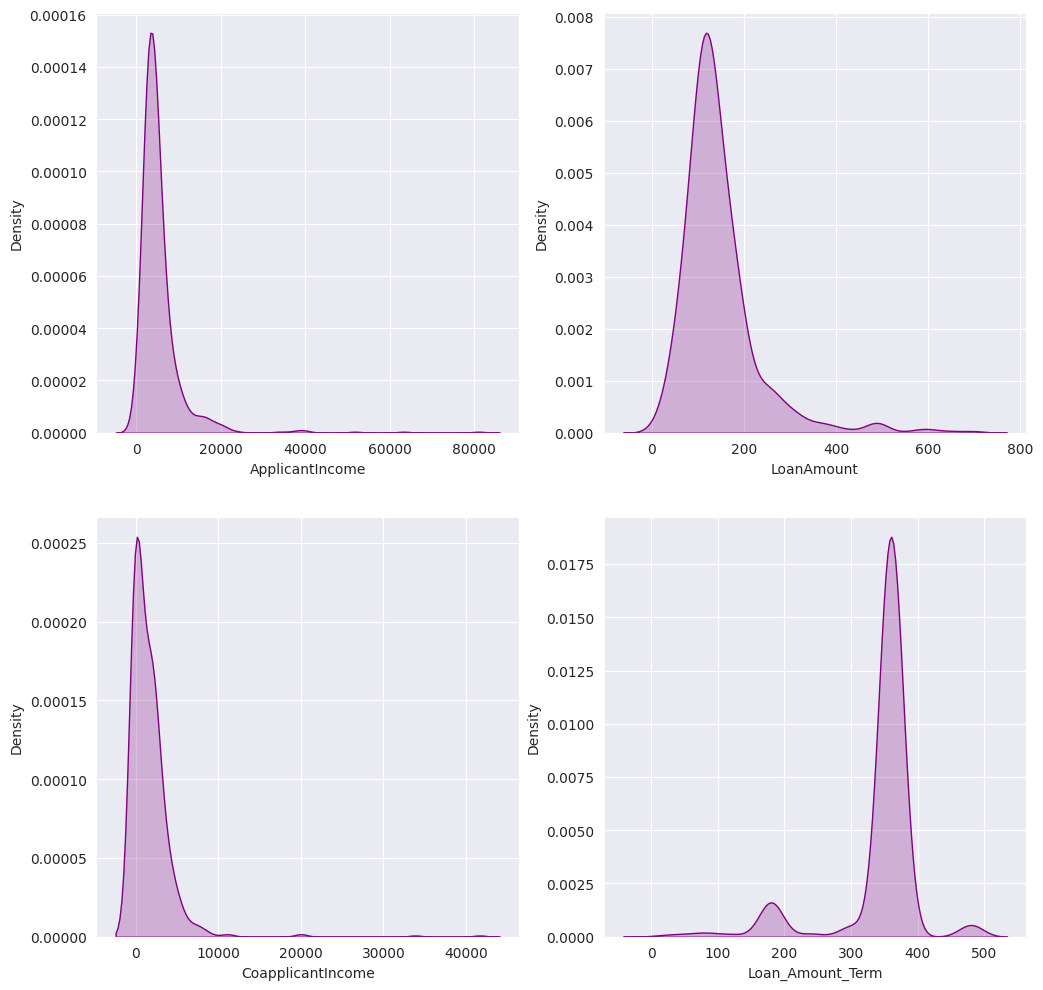

In [36]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
pltnumber = 1
for x in df[['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term']]:
    ax = plt.subplot(2,2,pltnumber)
    sns.kdeplot(data=df, x=x, fill=True, color="purple")
    pltnumber+=1

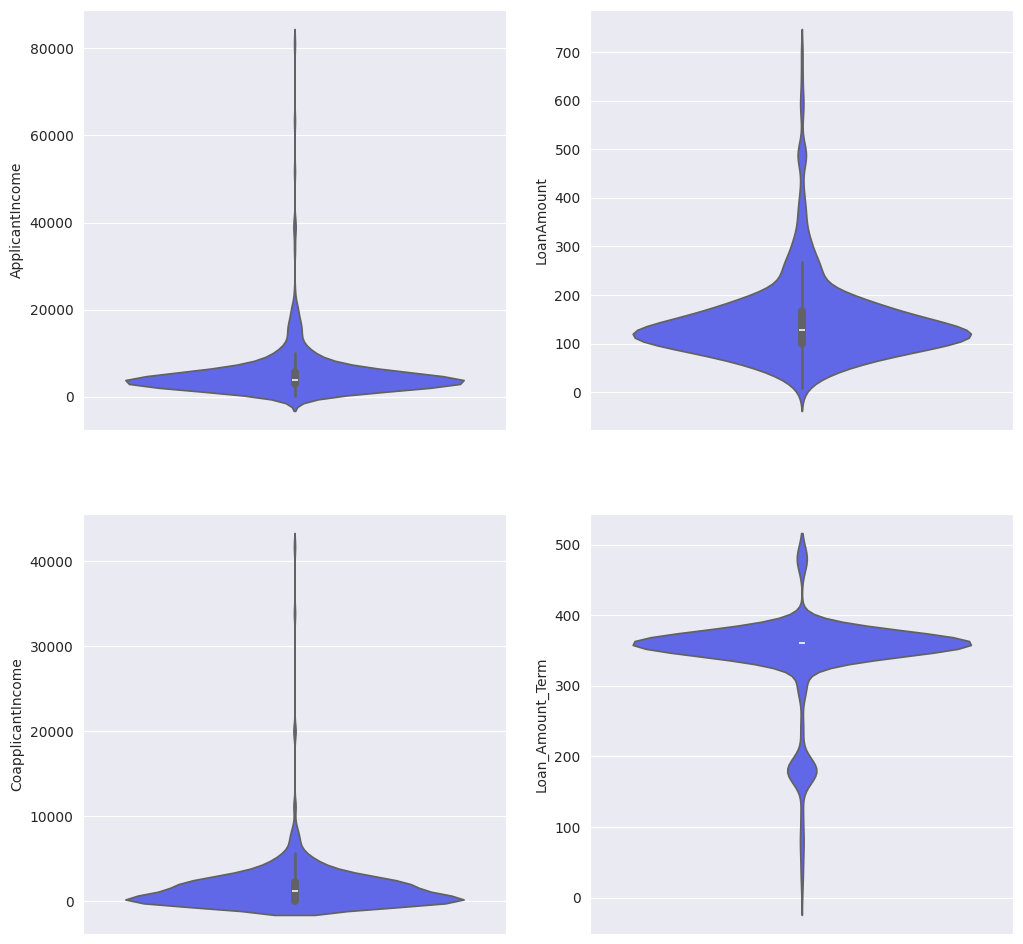

In [37]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
pltnumber = 1
for x in df[['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term']]:
    ax = plt.subplot(2,2,pltnumber)
    sns.violinplot(data=df, y=x, color="#4b54fd")
    pltnumber+=1

<Axes: xlabel='Property_Area', ylabel='count'>

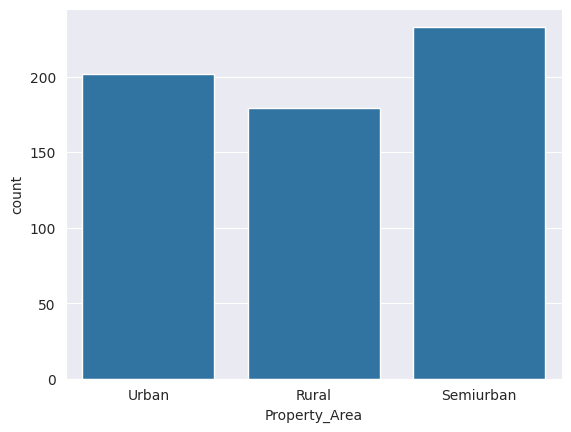

In [38]:
sns.countplot(data=df, x='Property_Area')

In [39]:
pd.crosstab(df['Gender'],columns=df['Loan_Status'])

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

In [40]:
pd.crosstab(df['Property_Area'], columns=df['Loan_Status'])

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133

In [41]:
#You can't say that bias is there with respect to property area 

In [42]:
pd.crosstab(df['Education'], columns=df['Loan_Status'])

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82

In [43]:
pd.crosstab(df['Married'], columns=df['Loan_Status'])

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285

In [44]:
pd.crosstab(df['Dependents'], columns=df['Loan_Status'])

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33

<h2 style="color:#55007f">FEATURE ENGINEERING</h2>

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
#First we will fill categorical column null values with the mode i.e, most frequently occuring value

In [47]:
si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [48]:
df['Married'].mode()

0    Yes
Name: Married, dtype: object

In [49]:
df[['Married']] = si.fit_transform(df[['Married']])
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [50]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
#It works so we will do it for multiple categorical columns at once

In [52]:
df[['Gender','Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']] = si.fit_transform(df[['Gender','Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']])
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Amount_Term  \
0               5849                0.0         NaN            360.0   
1               4583             1508.0       128.0            360.0   
2               3000                0.0        66.0            360.0   
3               2583             2358.0       120.0            360.0   
4               6000                0.0       141.0            360.0   
..               ...                ...         ...              ...   
609             2900                0.0        71.0            360.0   
610             4106                0.0        40.0            180.0   
611             8072              240.0       253.0            360.0   
612             7583                0.0       187.0            360.0   
613             4583                0.0       133.0            360.0   

    Credit_History Property_Area Loan_Status  
0              1.0         Urban           Y  
1              1.0         Rural           N  
2              1.0         Urban           Y  
3              1.0         Urban           Y  
4              1.0         Urban           Y  
..             ...           ...         ...  
609            1.0         Rural           Y  
610            1.0         Rural           Y  
611            1.0         Urban           Y  
612            1.0         Urban           Y  
613            0.0     Semiurban           N  

[614 rows x 13 columns]

In [53]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
df.isnull().sum().sum()

22

In [55]:
#Now only numerical data column of loan amount remaining.
#We will fill these null values with mean values

In [56]:
print(df['LoanAmount'].mean())

146.41216216216216


In [57]:
si = SimpleImputer(missing_values=np.nan, strategy='mean')

In [58]:
df[['LoanAmount']] = si.fit_transform(df[['LoanAmount']])
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Amount_Term  \
0               5849                0.0  146.412162            360.0   
1               4583             1508.0  128.000000            360.0   
2               3000                0.0   66.000000            360.0   
3               2583             2358.0  120.000000            360.0   
4               6000                0.0  141.000000            360.0   
..               ...                ...         ...              ...   
609             2900                0.0   71.000000            360.0   
610             4106                0.0   40.000000            180.0   
611             8072              240.0  253.000000            360.0   
612             7583                0.0  187.000000            360.0   
613             4583                0.0  133.000000            360.0   

    Credit_History Property_Area Loan_Status  
0              1.0         Urban           Y  
1              1.0         Rural           N  
2              1.0         Urban           Y  
3              1.0         Urban           Y  
4              1.0         Urban           Y  
..             ...           ...         ...  
609            1.0         Rural           Y  
610            1.0         Rural           Y  
611            1.0         Urban           Y  
612            1.0         Urban           Y  
613            0.0     Semiurban           N  

[614 rows x 13 columns]

In [59]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<p style="font-size:120%;color:#3ab41f">We have filled all the null values in the dataset</p>

In [60]:
#Now, we will covert the categorical columns using one hot encoding technique

In [61]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education',	'Self_Employed', 'Property_Area']

cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [62]:
df = pd.get_dummies(data=df, columns=cat_cols,dtype=int, drop_first=True)
df

Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0    LP001002             5849                0.0  146.412162   
1    LP001003             4583             1508.0  128.000000   
2    LP001005             3000                0.0   66.000000   
3    LP001006             2583             2358.0  120.000000   
4    LP001008             6000                0.0  141.000000   
..        ...              ...                ...         ...   
609  LP002978             2900                0.0   71.000000   
610  LP002979             4106                0.0   40.000000   
611  LP002983             8072              240.0  253.000000   
612  LP002984             7583                0.0  187.000000   
613  LP002990             4583                0.0  133.000000   

    Loan_Amount_Term Credit_History Loan_Status  Gender_Male  Married_Yes  \
0              360.0            1.0           Y            1            0   
1              360.0            1.0           N            1            1   
2              360.0            1.0           Y            1            1   
3              360.0            1.0           Y            1            1   
4              360.0            1.0           Y            1            0   
..               ...            ...         ...          ...          ...   
609            360.0            1.0           Y            0            0   
610            180.0            1.0           Y            1            1   
611            360.0            1.0           Y            1            1   
612            360.0            1.0           Y            1            1   
613            360.0            0.0           N            0            0   

     Dependents_1  Dependents_2  Dependents_3+  Education_Not Graduate  \
0               0             0              0                       0   
1               1             0              0                       0   
2               0             0              0                       0   
3               0             0              0                       1   
4               0             0              0                       0   
..            ...           ...            ...                     ...   
609             0             0              0                       0   
610             0             0              1                       0   
611             1             0              0                       0   
612             0             1              0                       0   
613             0             0              0                       0   

     Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban  
0                    0                        0                    1  
1                    0                        0                    0  
2                    1                        0                    1  
3                    0                        0                    1  
4                    0                        0                    1  
..                 ...                      ...                  ...  
609                  0                        0                    0  
610                  0                        0                    0  
611                  0                        0                    1  
612                  0                        0                    1  
613                  1                        1                    0  

[614 rows x 16 columns]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    object 
 5   Credit_History           614 non-null    object 
 6   Loan_Status              614 non-null    object 
 7   Gender_Male              614 non-null    int64  
 8   Married_Yes              614 non-null    int64  
 9   Dependents_1             614 non-null    int64  
 10  Dependents_2             614 non-null    int64  
 11  Dependents_3+            614 non-null    int64  
 12  Education_Not Graduate   614 non-null    int64  
 13  Self_Employed_Yes        614 non-null    int64  
 14  Property_Area_Semiurban  6

In [64]:
#There are two object columns now one of them is the targte variable which we will encode now with Label Encoder

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
labelencoder = LabelEncoder()

In [67]:
df['Loan_Status'] = labelencoder.fit_transform(df['Loan_Status'])
df

Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0    LP001002             5849                0.0  146.412162   
1    LP001003             4583             1508.0  128.000000   
2    LP001005             3000                0.0   66.000000   
3    LP001006             2583             2358.0  120.000000   
4    LP001008             6000                0.0  141.000000   
..        ...              ...                ...         ...   
609  LP002978             2900                0.0   71.000000   
610  LP002979             4106                0.0   40.000000   
611  LP002983             8072              240.0  253.000000   
612  LP002984             7583                0.0  187.000000   
613  LP002990             4583                0.0  133.000000   

    Loan_Amount_Term Credit_History  Loan_Status  Gender_Male  Married_Yes  \
0              360.0            1.0            1            1            0   
1              360.0            1.0            0            1            1   
2              360.0            1.0            1            1            1   
3              360.0            1.0            1            1            1   
4              360.0            1.0            1            1            0   
..               ...            ...          ...          ...          ...   
609            360.0            1.0            1            0            0   
610            180.0            1.0            1            1            1   
611            360.0            1.0            1            1            1   
612            360.0            1.0            1            1            1   
613            360.0            0.0            0            0            0   

     Dependents_1  Dependents_2  Dependents_3+  Education_Not Graduate  \
0               0             0              0                       0   
1               1             0              0                       0   
2               0             0              0                       0   
3               0             0              0                       1   
4               0             0              0                       0   
..            ...           ...            ...                     ...   
609             0             0              0                       0   
610             0             0              1                       0   
611             1             0              0                       0   
612             0             1              0                       0   
613             0             0              0                       0   

     Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban  
0                    0                        0                    1  
1                    0                        0                    0  
2                    1                        0                    1  
3                    0                        0                    1  
4                    0                        0                    1  
..                 ...                      ...                  ...  
609                  0                        0                    0  
610                  0                        0                    0  
611                  0                        0                    1  
612                  0                        0                    1  
613                  1                        1                    0  

[614 rows x 16 columns]

<p style="font-size:120%;color:#beb20b">We have encoded the LOAN STATUS column values 'Y' has been encoded with 1 and 'N' with 0</p>

In [68]:
df['Credit_History'].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [69]:
df['Credit_History'] = df['Credit_History'].astype('int')
df

Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0    LP001002             5849                0.0  146.412162   
1    LP001003             4583             1508.0  128.000000   
2    LP001005             3000                0.0   66.000000   
3    LP001006             2583             2358.0  120.000000   
4    LP001008             6000                0.0  141.000000   
..        ...              ...                ...         ...   
609  LP002978             2900                0.0   71.000000   
610  LP002979             4106                0.0   40.000000   
611  LP002983             8072              240.0  253.000000   
612  LP002984             7583                0.0  187.000000   
613  LP002990             4583                0.0  133.000000   

    Loan_Amount_Term  Credit_History  Loan_Status  Gender_Male  Married_Yes  \
0              360.0               1            1            1            0   
1              360.0               1            0            1            1   
2              360.0               1            1            1            1   
3              360.0               1            1            1            1   
4              360.0               1            1            1            0   
..               ...             ...          ...          ...          ...   
609            360.0               1            1            0            0   
610            180.0               1            1            1            1   
611            360.0               1            1            1            1   
612            360.0               1            1            1            1   
613            360.0               0            0            0            0   

     Dependents_1  Dependents_2  Dependents_3+  Education_Not Graduate  \
0               0             0              0                       0   
1               1             0              0                       0   
2               0             0              0                       0   
3               0             0              0                       1   
4               0             0              0                       0   
..            ...           ...            ...                     ...   
609             0             0              0                       0   
610             0             0              1                       0   
611             1             0              0                       0   
612             0             1              0                       0   
613             0             0              0                       0   

     Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban  
0                    0                        0                    1  
1                    0                        0                    0  
2                    1                        0                    1  
3                    0                        0                    1  
4                    0                        0                    1  
..                 ...                      ...                  ...  
609                  0                        0                    0  
610                  0                        0                    0  
611                  0                        0                    1  
612                  0                        0                    1  
613                  1                        1                    0  

[614 rows x 16 columns]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    object 
 5   Credit_History           614 non-null    int64  
 6   Loan_Status              614 non-null    int64  
 7   Gender_Male              614 non-null    int64  
 8   Married_Yes              614 non-null    int64  
 9   Dependents_1             614 non-null    int64  
 10  Dependents_2             614 non-null    int64  
 11  Dependents_3+            614 non-null    int64  
 12  Education_Not Graduate   614 non-null    int64  
 13  Self_Employed_Yes        614 non-null    int64  
 14  Property_Area_Semiurban  6

In [71]:
#Drop LOAN ID column as every sample id is unique and it will not have a say in loan status value

In [72]:
df.drop('Loan_ID', axis=1, inplace=True)
df

ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Amount_Term  \
0               5849                0.0  146.412162            360.0   
1               4583             1508.0  128.000000            360.0   
2               3000                0.0   66.000000            360.0   
3               2583             2358.0  120.000000            360.0   
4               6000                0.0  141.000000            360.0   
..               ...                ...         ...              ...   
609             2900                0.0   71.000000            360.0   
610             4106                0.0   40.000000            180.0   
611             8072              240.0  253.000000            360.0   
612             7583                0.0  187.000000            360.0   
613             4583                0.0  133.000000            360.0   

     Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0                 1            1            1            0             0   
1                 1            0            1            1             1   
2                 1            1            1            1             0   
3                 1            1            1            1             0   
4                 1            1            1            0             0   
..              ...          ...          ...          ...           ...   
609               1            1            0            0             0   
610               1            1            1            1             0   
611               1            1            1            1             1   
612               1            1            1            1             0   
613               0            0            0            0             0   

     Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0               0              0                       0                  0   
1               0              0                       0                  0   
2               0              0                       0                  1   
3               0              0                       1                  0   
4               0              0                       0                  0   
..            ...            ...                     ...                ...   
609             0              0                       0                  0   
610             0              1                       0                  0   
611             0              0                       0                  0   
612             1              0                       0                  0   
613             0              0                       0                  1   

     Property_Area_Semiurban  Property_Area_Urban  
0                          0                    1  
1                          0                    0  
2                          0                    1  
3                          0                    1  
4                          0                    1  
..                       ...                  ...  
609                        0                    0  
610                        0                    0  
611                        0                    1  
612                        0                    1  
613                        1                    0  

[614 rows x 15 columns]

In [73]:
#We can create a new column containing values from Applicant Income and Coapplicant Income and name it total income

In [74]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df

ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Amount_Term  \
0               5849                0.0  146.412162            360.0   
1               4583             1508.0  128.000000            360.0   
2               3000                0.0   66.000000            360.0   
3               2583             2358.0  120.000000            360.0   
4               6000                0.0  141.000000            360.0   
..               ...                ...         ...              ...   
609             2900                0.0   71.000000            360.0   
610             4106                0.0   40.000000            180.0   
611             8072              240.0  253.000000            360.0   
612             7583                0.0  187.000000            360.0   
613             4583                0.0  133.000000            360.0   

     Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0                 1            1            1            0             0   
1                 1            0            1            1             1   
2                 1            1            1            1             0   
3                 1            1            1            1             0   
4                 1            1            1            0             0   
..              ...          ...          ...          ...           ...   
609               1            1            0            0             0   
610               1            1            1            1             0   
611               1            1            1            1             1   
612               1            1            1            1             0   
613               0            0            0            0             0   

     Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0               0              0                       0                  0   
1               0              0                       0                  0   
2               0              0                       0                  1   
3               0              0                       1                  0   
4               0              0                       0                  0   
..            ...            ...                     ...                ...   
609             0              0                       0                  0   
610             0              1                       0                  0   
611             0              0                       0                  0   
612             1              0                       0                  0   
613             0              0                       0                  1   

     Property_Area_Semiurban  Property_Area_Urban  TotalIncome  
0                          0                    1       5849.0  
1                          0                    0       6091.0  
2                          0                    1       3000.0  
3                          0                    1       4941.0  
4                          0                    1       6000.0  
..                       ...                  ...          ...  
609                        0                    0       2900.0  
610                        0                    0       4106.0  
611                        0                    1       8312.0  
612                        0                    1       7583.0  
613                        1                    0       4583.0  

[614 rows x 16 columns]

In [75]:
np.log(df['LoanAmount'])

0      4.986426
1      4.852030
2      4.189655
3      4.787492
4      4.948760
         ...   
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349
Name: LoanAmount, Length: 614, dtype: float64

<p style="font-size:120%;color:#aa0000">We will create new column which will contain the log values of Loan Amount column as loan amount column has many outlier values</p>

In [76]:
df['Loan_Amount_log'] = np.log(df['LoanAmount'])
df

ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Amount_Term  \
0               5849                0.0  146.412162            360.0   
1               4583             1508.0  128.000000            360.0   
2               3000                0.0   66.000000            360.0   
3               2583             2358.0  120.000000            360.0   
4               6000                0.0  141.000000            360.0   
..               ...                ...         ...              ...   
609             2900                0.0   71.000000            360.0   
610             4106                0.0   40.000000            180.0   
611             8072              240.0  253.000000            360.0   
612             7583                0.0  187.000000            360.0   
613             4583                0.0  133.000000            360.0   

     Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0                 1            1            1            0             0   
1                 1            0            1            1             1   
2                 1            1            1            1             0   
3                 1            1            1            1             0   
4                 1            1            1            0             0   
..              ...          ...          ...          ...           ...   
609               1            1            0            0             0   
610               1            1            1            1             0   
611               1            1            1            1             1   
612               1            1            1            1             0   
613               0            0            0            0             0   

     Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0               0              0                       0                  0   
1               0              0                       0                  0   
2               0              0                       0                  1   
3               0              0                       1                  0   
4               0              0                       0                  0   
..            ...            ...                     ...                ...   
609             0              0                       0                  0   
610             0              1                       0                  0   
611             0              0                       0                  0   
612             1              0                       0                  0   
613             0              0                       0                  1   

     Property_Area_Semiurban  Property_Area_Urban  TotalIncome  \
0                          0                    1       5849.0   
1                          0                    0       6091.0   
2                          0                    1       3000.0   
3                          0                    1       4941.0   
4                          0                    1       6000.0   
..                       ...                  ...          ...   
609                        0                    0       2900.0   
610                        0                    0       4106.0   
611                        0                    1       8312.0   
612                        0                    1       7583.0   
613                        1                    0       4583.0   

     Loan_Amount_log  
0           4.986426  
1           4.852030  
2           4.189655  
3           4.787492  
4           4.948760  
..               ...  
609         4.262680  
610         3.688879  
611         5.533389  
612         5.231109  
613         4.890349  

[614 rows x 17 columns]

In [77]:
df.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome                 1.000000          -0.116605    0.565620   
CoapplicantIncome              -0.116605           1.000000    0.187828   
LoanAmount                      0.565620           0.187828    1.000000   
Loan_Amount_Term               -0.046531          -0.059383    0.036475   
Credit_History                 -0.018615           0.011134   -0.001431   
Loan_Status                    -0.004710          -0.059187   -0.036416   
Gender_Male                     0.058809           0.082912    0.107930   
Married_Yes                     0.051708           0.075948    0.147141   
Dependents_1                    0.040861          -0.029769    0.062359   
Dependents_2                   -0.034650           0.010016    0.019547   
Dependents_3+                   0.156687           0.041491    0.153200   
Education_Not Graduate         -0.140760          -0.062290   -0.166998   
Self_Employed_Yes               0.127180          -0.016100    0.115260   
Property_Area_Semiurban        -0.014246          -0.027044   -0.008273   
Property_Area_Urban            -0.000598           0.022776   -0.033220   
TotalIncome                     0.893037           0.342781    0.620102   
Loan_Amount_log                 0.434849           0.204179    0.895324   

                         Loan_Amount_Term  Credit_History  Loan_Status  \
ApplicantIncome                 -0.046531       -0.018615    -0.004710   
CoapplicantIncome               -0.059383        0.011134    -0.059187   
LoanAmount                       0.036475       -0.001431    -0.036416   
Loan_Amount_Term                 1.000000       -0.004705    -0.022549   
Credit_History                  -0.004705        1.000000     0.540556   
Loan_Status                     -0.022549        0.540556     1.000000   
Gender_Male                     -0.074030        0.009170     0.017987   
Married_Yes                     -0.100912        0.010938     0.091478   
Dependents_1                    -0.088492        0.009757    -0.038740   
Dependents_2                    -0.010609        0.007987     0.062384   
Dependents_3+                   -0.077273       -0.060473    -0.026123   
Education_Not Graduate          -0.073928       -0.073658    -0.085884   
Self_Employed_Yes               -0.033739       -0.001550    -0.003700   
Property_Area_Semiurban          0.059141        0.035976     0.136540   
Property_Area_Urban             -0.094279       -0.016934    -0.043621   
TotalIncome                     -0.070917       -0.012563    -0.031271   
Loan_Amount_log                  0.084616       -0.019542    -0.041874   

                         Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
ApplicantIncome             0.058809     0.051708      0.040861     -0.034650   
CoapplicantIncome           0.082912     0.075948     -0.029769      0.010016   
LoanAmount                  0.107930     0.147141      0.062359      0.019547   
Loan_Amount_Term           -0.074030    -0.100912     -0.088492     -0.010609   
Credit_History              0.009170     0.010938      0.009757      0.007987   
Loan_Status                 0.017987     0.091478     -0.038740      0.062384   
Gender_Male                 1.000000     0.364569     -0.004466      0.129953   
Married_Yes                 0.364569     1.000000      0.113853      0.249547   
Dependents_1               -0.004466     0.113853      1.000000     -0.198046   
Dependents_2                0.129953     0.249547     -0.198046      1.000000   
Dependents_3+               0.096319     0.132566     -0.134337     -0.133547   
Education_Not Graduate      0.045364     0.012304     -0.013355      0.020822   
Self_Employed_Yes          -0.000525     0.004489      0.082044      0.032434   
Property_Area_Semiurban    -0.108623     0.005845      0.011661     -0.012017   
Property_Area_Urban         0.034530     0.000546      0.069320      0.016569   
TotalIncome                 0.093191     0.08

<Axes: >

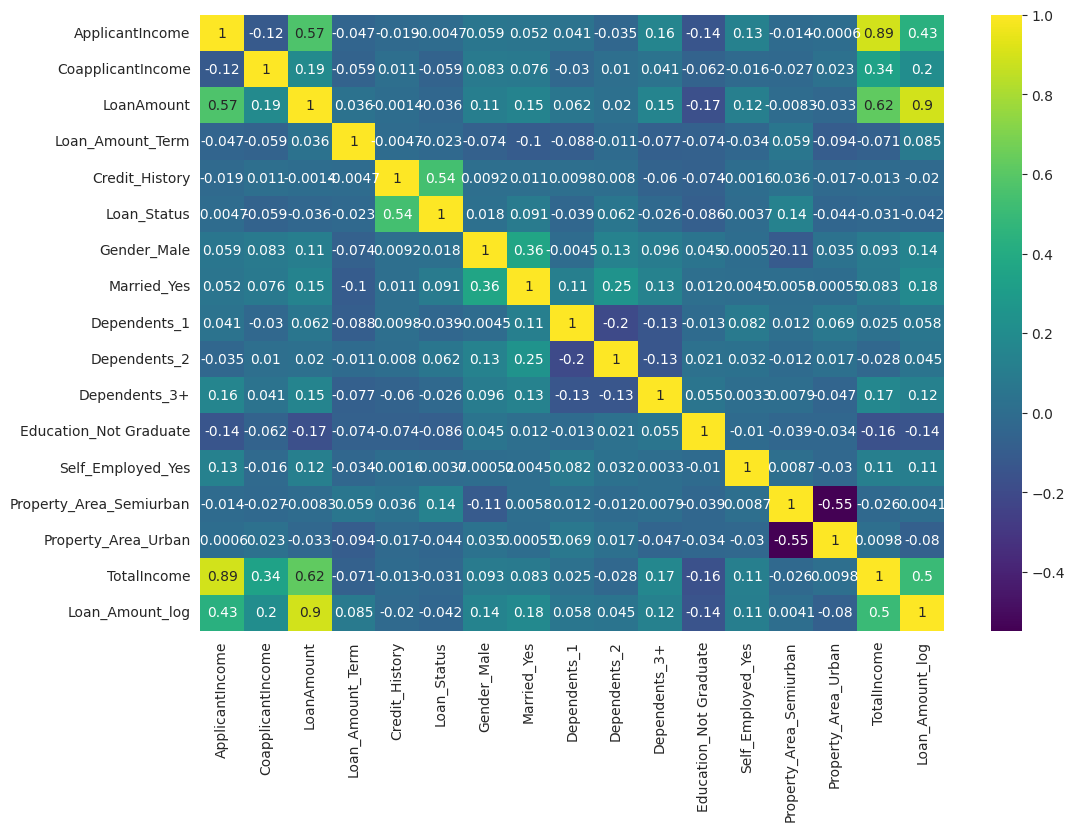

In [78]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2g',cmap='viridis' ,annot_kws={'size':10})

<p style="font-size:120%;color:#838341">From the heatmap it is clear that previous credit history is crucial in determing whether loan will be given or not</p>

<h2 style="color:#be7b38">DATA PREPROCESSING</h2>

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [80]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [82]:
X_train.shape

(491, 16)

In [83]:
X_train

ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Amount_Term  \
382             6000                0.0       156.0            360.0   
597             2987                0.0        88.0            360.0   
388             2333             2417.0       136.0            360.0   
278            14583                0.0       436.0            360.0   
31              3167                0.0        74.0            360.0   
..               ...                ...         ...              ...   
75              3750                0.0       113.0            480.0   
599             5780                0.0       192.0            360.0   
575             3159              461.0       108.0             84.0   
337             2500             4600.0       176.0            360.0   
523             7948             7166.0       480.0            360.0   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
382               1            0            0             0             0   
597               0            1            0             0             0   
388               1            1            1             0             0   
278               1            1            1             0             0   
31                1            1            0             0             0   
..              ...          ...          ...           ...           ...   
75                1            1            0             0             0   
599               1            1            1             0             1   
575               1            1            1             0             1   
337               1            1            1             0             1   
523               1            1            1             0             1   

     Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
382              0                       0                  0   
597              0                       0                  0   
388              0                       0                  0   
278              0                       0                  0   
31               0                       0                  0   
..             ...                     ...                ...   
75               0                       0                  0   
599              0                       0                  0   
575              0                       0                  0   
337              0                       0                  1   
523              0                       0                  1   

     Property_Area_Semiurban  Property_Area_Urban  TotalIncome  \
382                        0                    1       6000.0   
597                        1                    0       2987.0   
388                        0                    1       4750.0   
278                        1                    0      14583.0   
31                         0                    1       3167.0   
..                       ...                  ...          ...   
75                         0                    1       3750.0   
599                        0                    1       5780.0   
575                        0                    1       3620.0   
337                        0                    0       7100.0   
523                        0                    0      15114.0   

     Loan_Amount_log  
382         5.049856  
597         4.477337  
388         4.912655  
278         6.077642  
31          4.304065  
..               ...  
75          4.727388  
599         5.257495  
575         4.682131  
337         5.170484  
523         6.173786  

[491 rows x 16 columns]

In [84]:
X_test.shape

(123, 16)

In [85]:
y_train

382    1
597    0
388    1
278    1
31     0
      ..
75     0
599    1
575    1
337    1
523    1
Name: Loan_Status, Length: 491, dtype: int64

In [86]:
y_test

216    0
55     1
593    1
438    0
351    0
      ..
437    1
283    1
2      1
355    1
353    0
Name: Loan_Status, Length: 123, dtype: int64

In [87]:
scaler = StandardScaler()

In [88]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.090389          -0.540405    0.119157          0.280327   
1          -0.368671          -0.540405   -0.696761          0.280327   
2          -0.468315           0.225251   -0.120819          0.280327   
3           1.398093          -0.540405    3.478818          0.280327   
4          -0.341247          -0.540405   -0.864744          0.280327   
..               ...                ...         ...               ...   
486        -0.252421          -0.540405   -0.396791          2.137821   
487         0.056870          -0.540405    0.551113          0.280327   
488        -0.342465          -0.394370   -0.456785         -3.991910   
489        -0.442871           0.916781    0.359133          0.280327   
490         0.387186           1.729638    4.006765          0.280327   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0          0.397516     -2.09657    -1.425084     -0.434583     -0.451034   
1         -2.515623      0.47697    -1.425084     -0.434583     -0.451034   
2          0.397516      0.47697     0.701713     -0.434583     -0.451034   
3          0.397516      0.47697     0.701713     -0.434583     -0.451034   
4          0.397516      0.47697    -1.425084     -0.434583     -0.451034   
..              ...          ...          ...           ...           ...   
486        0.397516      0.47697    -1.425084     -0.434583     -0.451034   
487        0.397516      0.47697     0.701713     -0.434583      2.217129   
488        0.397516      0.47697     0.701713     -0.434583      2.217129   
489        0.397516      0.47697     0.701713     -0.434583      2.217129   
490        0.397516      0.47697     0.701713     -0.434583      2.217129   

     Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0        -0.305845               -0.531022          -0.376644   
1        -0.305845               -0.531022          -0.376644   
2        -0.305845               -0.531022          -0.376644   
3        -0.305845               -0.531022          -0.376644   
4        -0.305845               -0.531022          -0.376644   
..             ...                     ...                ...   
486      -0.305845               -0.531022          -0.376644   
487      -0.305845               -0.531022          -0.376644   
488      -0.305845               -0.531022          -0.376644   
489      -0.305845               -0.531022           2.655029   
490      -0.305845               -0.531022           2.655029   

     Property_Area_Semiurban  Property_Area_Urban  TotalIncome  \
0                  -0.808207             1.458557    -0.159943   
1                   1.237307            -0.685609    -0.593049   
2                  -0.808207             1.458557    -0.339625   
3                   1.237307            -0.685609     1.073828   
4                  -0.808207             1.458557    -0.567174   
..                       ...                  ...          ...   
486                -0.808207             1.458557    -0.483371   
487                -0.808207             1.458557    -0.191567   
488                -0.808207             1.458557    -0.502058   
489                -0.808207            -0.685609    -0.001822   
490                -0.808207            -0.685609     1.150157   

     Loan_Amount_log  
0           0.385422  
1          -0.795730  
2           0.102365  
3           2.505825  
4          -1.153203  
..               ...  
486        -0.279855  
487         0.813798  
488        -0.373223  
489         0.634287  
490         2.704177  

[491 rows x 16 columns]

In [89]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0          -0.800916           0.029798   -0.132818          0.280327   
1          -0.411180          -0.170724   -0.588772          0.280327   
2          -0.235814           0.504968   -0.048826         -2.505915   
3           0.763210          -0.540405    0.491119          0.280327   
4           0.509378           0.779616    1.942973          0.280327   
..               ...                ...         ...               ...   
118        -0.486598          -0.184028    0.004114          0.280327   
119        -0.547846          -0.012650   -1.104720          0.280327   
120        -0.366691          -0.540405   -0.960734          0.280327   
121        -0.242822          -0.540405   -0.360795         -2.505915   
122         0.014209          -0.540405   -0.492781          0.280327   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0          0.397516      0.47697     0.701713     -0.434583     -0.451034   
1          0.397516      0.47697     0.701713     -0.434583      2.217129   
2          0.397516      0.47697     0.701713     -0.434583     -0.451034   
3         -2.515623      0.47697    -1.425084     -0.434583     -0.451034   
4          0.397516      0.47697    -1.425084     -0.434583     -0.451034   
..              ...          ...          ...           ...           ...   
118        0.397516      0.47697     0.701713     -0.434583     -0.451034   
119        0.397516     -2.09657    -1.425084     -0.434583     -0.451034   
120        0.397516      0.47697     0.701713     -0.434583     -0.451034   
121        0.397516     -2.09657    -1.425084     -0.434583     -0.451034   
122       -2.515623     -2.09657     0.701713     -0.434583     -0.451034   

     Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0        -0.305845               -0.531022          -0.376644   
1        -0.305845               -0.531022          -0.376644   
2        -0.305845               -0.531022          -0.376644   
3        -0.305845               -0.531022           2.655029   
4        -0.305845               -0.531022          -0.376644   
..             ...                     ...                ...   
118      -0.305845               -0.531022          -0.376644   
119      -0.305845               -0.531022          -0.376644   
120      -0.305845               -0.531022           2.655029   
121      -0.305845               -0.531022          -0.376644   
122      -0.305845               -0.531022           2.655029   

     Property_Area_Semiurban  Property_Area_Urban  TotalIncome  \
0                  -0.808207            -0.685609    -0.742113   
1                   1.237307            -0.685609    -0.465402   
2                  -0.808207            -0.685609     0.006659   
3                  -0.808207             1.458557     0.474839   
4                  -0.808207            -0.685609     0.834347   
..                       ...                  ...          ...   
118                -0.808207             1.458557    -0.542594   
119                -0.808207             1.458557    -0.522613   
120                -0.808207             1.458557    -0.591180   
121                -0.808207             1.458557    -0.474315   
122                -0.808207            -0.685609    -0.231815   

     Loan_Amount_log  
0           0.087139  
1          -0.594839  
2           0.191433  
3           0.759360  
4           1.788818  
..               ...  
118         0.254560  
119        -1.803240  
120        -1.389240  
121        -0.225798  
122        -0.431342  

[123 rows x 16 columns]

<p style="font-size:120%;color:#150fbe">Our training and testing data is scaled and ready for training the model</p>

<h2 style="color:#aa188b">MACHINE LEARNING MODEL TO PREDICT THE LOAN STATUS</h2>

In [90]:
#This is binary classification model

In [91]:
#So, we will logistic Regression

<h3>LOGISTIC REGRESSION</h3>

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logmodel = LogisticRegression()

In [94]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [95]:
log_pred = logmodel.predict(X_test)
log_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [97]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.95      0.47      0.63        45
           1       0.76      0.99      0.86        78

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.74       123
weighted avg       0.83      0.80      0.77       123



In [98]:
print(confusion_matrix(y_test, log_pred))

[[21 24]
 [ 1 77]]


In [99]:
print(accuracy_score(y_test, log_pred))

0.7967479674796748


<Axes: >

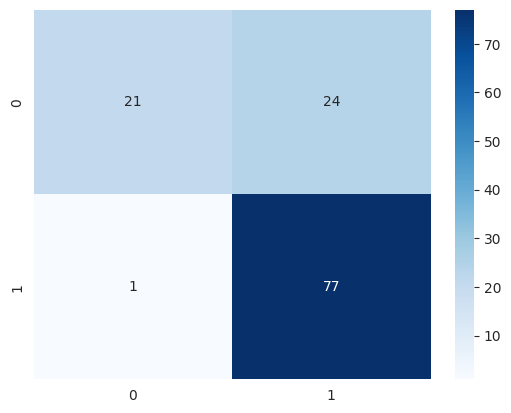

In [100]:
sns.heatmap(confusion_matrix(y_test, log_pred),annot=True,cmap='Blues')

In [101]:
roc_auc_score(y_test, log_pred)

0.726923076923077

Text(0.5, 1.0, 'ROC CURVE')

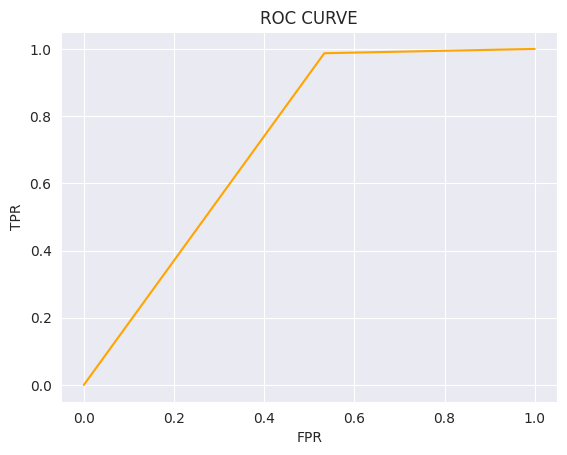

In [102]:
fpr, tpr, _ = roc_curve(y_test, log_pred)
plt.plot(fpr, tpr, color="orange")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

<p style="font-size:120%;color:#4952ff">We have found out that the model is giving decent accuracy but our model is not perfect.Its not learning about both the target classes</p>

<h3>DECISION TREE CLASSIFIER</h3>

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtc = DecisionTreeClassifier()

In [105]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
dtc_pred = dtc.predict(X_test)
dtc_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [107]:
print('ACCURACY SCORE : ', accuracy_score(y_test, dtc_pred))
print("Training accuracy :",dtc.score(X_train,y_train))
print("Test accuracy :",dtc.score(X_test,y_test))
print('ROC AUC SCORE : ', roc_auc_score(y_test, dtc_pred))
print('\n\n \n---------Confusion Matrix--------------')
print(confusion_matrix(y_test,dtc_pred))
print('\n\n-------------------Clasification Report--------')
print(classification_report(y_test,dtc_pred))


ACCURACY SCORE :  0.7154471544715447
Training accuracy : 1.0
Test accuracy : 0.7154471544715447
ROC AUC SCORE :  0.7098290598290599


 
---------Confusion Matrix--------------
[[31 14]
 [21 57]]


-------------------Clasification Report--------
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        45
           1       0.80      0.73      0.77        78

    accuracy                           0.72       123
   macro avg       0.70      0.71      0.70       123
weighted avg       0.73      0.72      0.72       123



In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
dtc_score=cross_val_score(dtc,X_train,y_train,cv=5,scoring='accuracy')
print(dtc_score)
print()
print("cross validation score for Decision Tree :",np.mean(dtc_score))

[0.66666667 0.76530612 0.71428571 0.74489796 0.71428571]

cross validation score for Decision Tree : 0.7210884353741497


<Axes: >

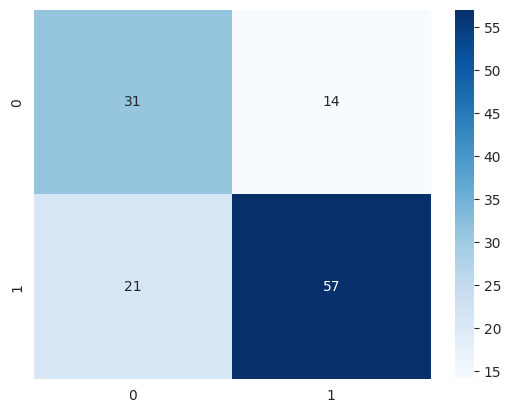

In [110]:
sns.heatmap(confusion_matrix(y_test, dtc_pred),annot=True,cmap='Blues')

Text(0.5, 1.0, 'ROC CURVE')

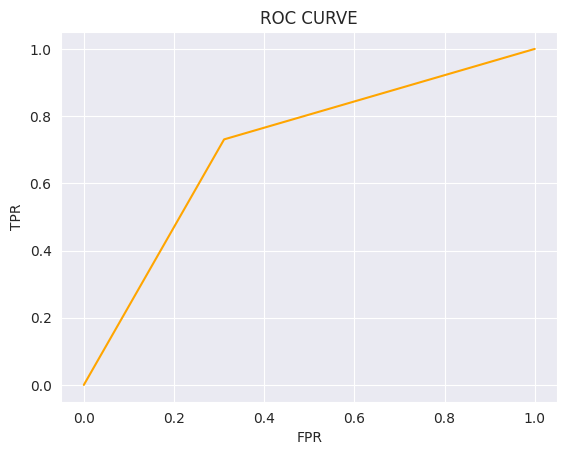

In [111]:
fpr, tpr, _ = roc_curve(y_test, dtc_pred)
plt.plot(fpr, tpr, color="orange")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

<p style="font-size:120%;color:#31aaa6">DTC MODEL IS NOT GOOD ENOUGH IN BOTH THE METRICS ACCURACY AND ROC_AUC_SCORE</p>

<h3>RANDOM FOREST CLASSIFIER</h3>

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rfc = RandomForestClassifier()

In [114]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [115]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [116]:
y_test

216    0
55     1
593    1
438    0
351    0
      ..
437    1
283    1
2      1
355    1
353    0
Name: Loan_Status, Length: 123, dtype: int64

In [117]:
print('ACCURACY SCORE : ', accuracy_score(y_test, rfc_pred))
print("Training accuracy: ",rfc.score(X_train,y_train))
print("Test accuracy : ",rfc.score(X_test,y_test))
print('ROC AUC SCORE : ', roc_auc_score(y_test, rfc_pred))
print('\n\n \n---------Confusion Matrix--------------')
print(confusion_matrix(y_test,rfc_pred))
print('\n\n \n---------Classification Report--------------')
print(classification_report(y_test,rfc_pred))


ACCURACY SCORE :  0.7967479674796748
Training accuracy:  1.0
Test accuracy :  0.7967479674796748
ROC AUC SCORE :  0.7363247863247864


 
---------Confusion Matrix--------------
[[23 22]
 [ 3 75]]


 
---------Classification Report--------------
              precision    recall  f1-score   support

           0       0.88      0.51      0.65        45
           1       0.77      0.96      0.86        78

    accuracy                           0.80       123
   macro avg       0.83      0.74      0.75       123
weighted avg       0.81      0.80      0.78       123



In [118]:
rfc_score=cross_val_score(rfc,X_train,y_train,cv=5,scoring='accuracy')
print(rfc_score)
print()
print("cross validation score for RFC :",np.mean(rfc_score))

[0.75757576 0.79591837 0.76530612 0.82653061 0.76530612]

cross validation score for RFC : 0.7821273964131107


<Axes: >

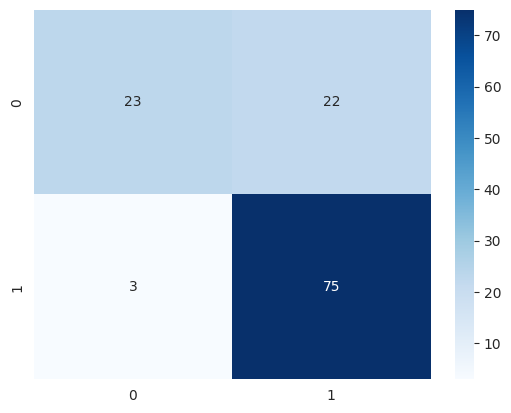

In [119]:
sns.heatmap(confusion_matrix(y_test, rfc_pred),annot=True,cmap='Blues')

Text(0.5, 1.0, 'ROC CURVE')

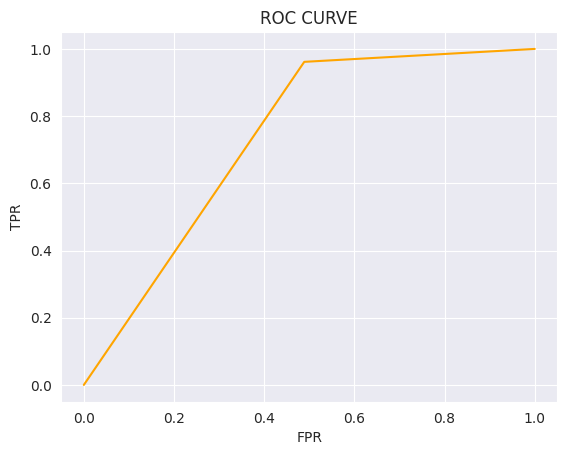

In [120]:
fpr, tpr, _ = roc_curve(y_test, rfc_pred)
plt.plot(fpr, tpr, color="orange")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

<h3>SVM</h3>

In [121]:
from sklearn.svm import SVC

In [122]:
svc = SVC()

In [123]:
svc.fit(X_train, y_train)

SVC()

In [124]:
svc_pred = svc.predict(X_test)
svc_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [125]:
print('ACCURACY SCORE : ', accuracy_score(y_test, svc_pred))
print("Training accuracy: ",svc.score(X_train,y_train))
print("Test accuracy : ",svc.score(X_test,y_test))
print('ROC AUC SCORE : ', roc_auc_score(y_test, svc_pred))
print('\n\n \n---------Confusion Matrix--------------')
print(confusion_matrix(y_test,svc_pred))
print('\n\n \n---------Classification Report--------------')
print(classification_report(y_test,svc_pred))

ACCURACY SCORE :  0.7967479674796748
Training accuracy:  0.8228105906313645
Test accuracy :  0.7967479674796748
ROC AUC SCORE :  0.726923076923077


 
---------Confusion Matrix--------------
[[21 24]
 [ 1 77]]


 
---------Classification Report--------------
              precision    recall  f1-score   support

           0       0.95      0.47      0.63        45
           1       0.76      0.99      0.86        78

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.74       123
weighted avg       0.83      0.80      0.77       123



In [126]:
svc_score=cross_val_score(svc,X_train,y_train,cv=5,scoring='accuracy')
print(svc_score)
print()
print("cross validation score for SVM :",np.mean(svc_score))

[0.77777778 0.83673469 0.80612245 0.84693878 0.75510204]

cross validation score for SVM : 0.8045351473922903


<Axes: >

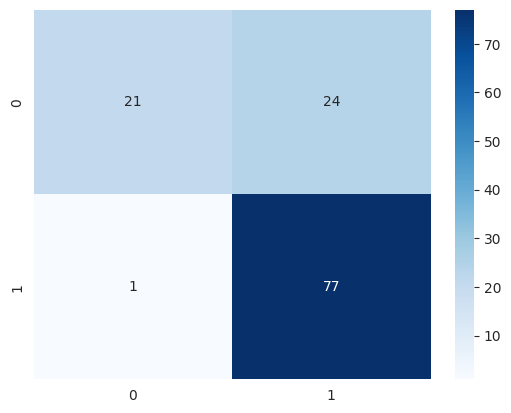

In [127]:
sns.heatmap(confusion_matrix(y_test, svc_pred),annot=True,cmap='Blues')

Text(0.5, 1.0, 'ROC CURVE')

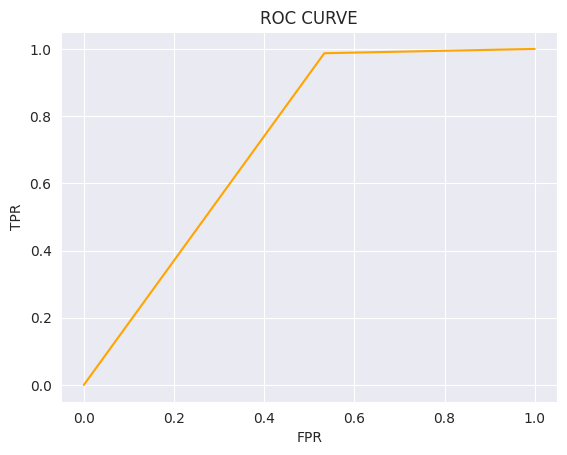

In [128]:
fpr, tpr, _ = roc_curve(y_test, svc_pred)
plt.plot(fpr, tpr, color="orange")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

<h3>KNN MODEL</h3>

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn = KNeighborsClassifier()

In [131]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [132]:
knn_pred = knn.predict(X_test)
knn_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [133]:
print('ACCURACY SCORE : ', accuracy_score(y_test, knn_pred))
print("Training accuracy: ",knn.score(X_train,y_train))
print("Test accuracy : ",knn.score(X_test,y_test))
print('ROC AUC SCORE : ', roc_auc_score(y_test, knn_pred))
print('\n\n \n---------Confusion Matrix--------------')
print(confusion_matrix(y_test,knn_pred))
print('\n\n \n---------Classification Report--------------')
print(classification_report(y_test,knn_pred))

ACCURACY SCORE :  0.8130081300813008
Training accuracy:  0.8268839103869654
Test accuracy :  0.8130081300813008
ROC AUC SCORE :  0.7491452991452991


 
---------Confusion Matrix--------------
[[23 22]
 [ 1 77]]


 
---------Classification Report--------------
              precision    recall  f1-score   support

           0       0.96      0.51      0.67        45
           1       0.78      0.99      0.87        78

    accuracy                           0.81       123
   macro avg       0.87      0.75      0.77       123
weighted avg       0.84      0.81      0.80       123



In [134]:
knn_score=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
print(knn_score)
print()
print("cross validation score for KNN :",np.mean(knn_score))

[0.77777778 0.73469388 0.74489796 0.79591837 0.74489796]

cross validation score for KNN : 0.7596371882086169


<Axes: >

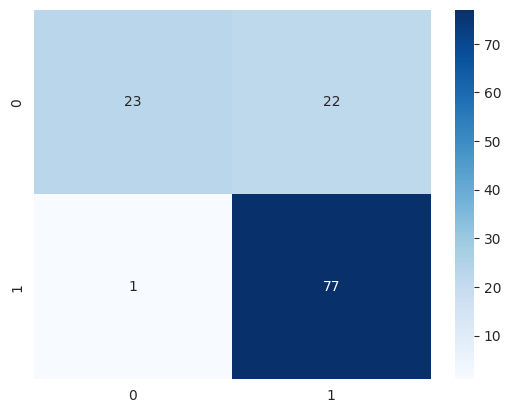

In [135]:
sns.heatmap(confusion_matrix(y_test, knn_pred),annot=True,cmap='Blues')

Text(0.5, 1.0, 'ROC CURVE')

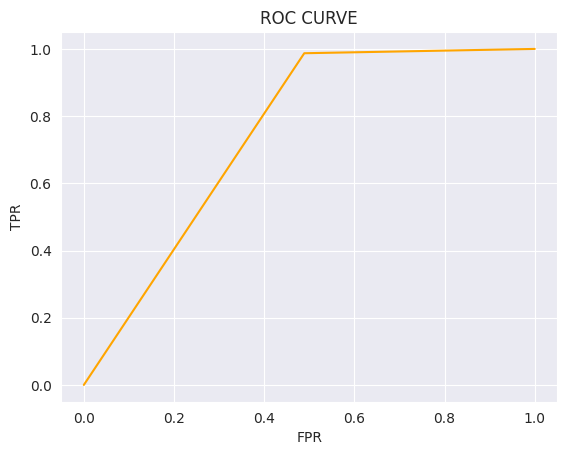

In [136]:
fpr, tpr, _ = roc_curve(y_test, knn_pred)
plt.plot(fpr, tpr, color="orange")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

<h3>ADABOOST</h3>

In [137]:
from sklearn.ensemble import AdaBoostClassifier

In [138]:
adaboost = AdaBoostClassifier()

In [139]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [140]:
adaboost_pred = adaboost.predict(X_test)
adaboost_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [141]:
print('ACCURACY SCORE : ', accuracy_score(y_test, adaboost_pred))
print("Training accuracy: ",adaboost.score(X_train,y_train))
print("Test accuracy : ",adaboost.score(X_test,y_test))
print('ROC AUC SCORE : ', roc_auc_score(y_test, adaboost_pred))
print('\n\n \n---------Confusion Matrix--------------')
print(confusion_matrix(y_test,adaboost_pred))
print('\n\n \n---------Classification Report--------------')
print(classification_report(y_test,adaboost_pred))

ACCURACY SCORE :  0.7804878048780488
Training accuracy:  0.869653767820774
Test accuracy :  0.7804878048780488
ROC AUC SCORE :  0.7188034188034188


 
---------Confusion Matrix--------------
[[22 23]
 [ 4 74]]


 
---------Classification Report--------------
              precision    recall  f1-score   support

           0       0.85      0.49      0.62        45
           1       0.76      0.95      0.85        78

    accuracy                           0.78       123
   macro avg       0.80      0.72      0.73       123
weighted avg       0.79      0.78      0.76       123



In [142]:
adaboost_score=cross_val_score(adaboost,X_train,y_train,cv=5,scoring='accuracy')
print(adaboost_score)
print()
print("cross validation score for ADABOOST :",np.mean(adaboost_score))

[0.76767677 0.7755102  0.81632653 0.80612245 0.75510204]

cross validation score for ADABOOST : 0.7841475984333128


<Axes: >

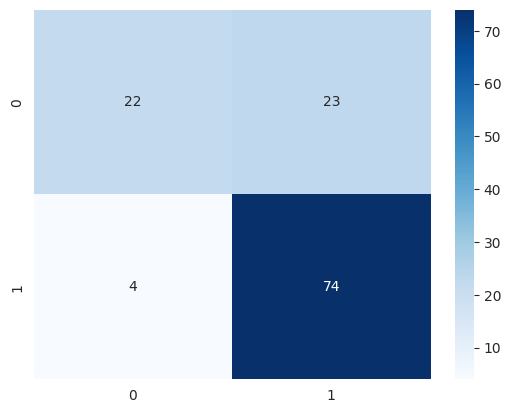

In [143]:
sns.heatmap(confusion_matrix(y_test, adaboost_pred),annot=True,cmap='Blues')

Text(0.5, 1.0, 'ROC CURVE')

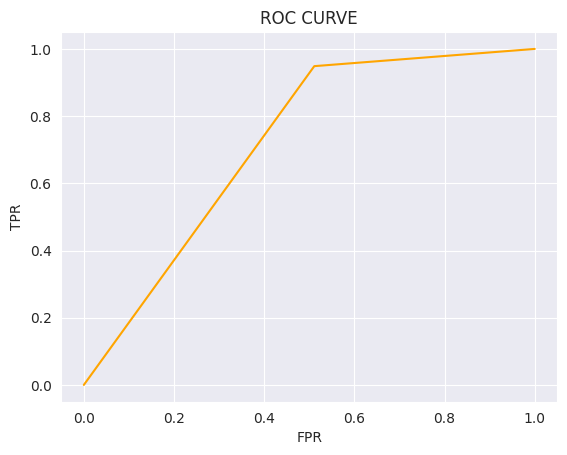

In [144]:
fpr, tpr, _ = roc_curve(y_test, adaboost_pred)
plt.plot(fpr, tpr, color="orange")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

<h3>Gradient Boosting</h3>

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

In [146]:
gbc = GradientBoostingClassifier()

In [147]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [148]:
gbc_pred = gbc.predict(X_test)
gbc_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [149]:
print('ACCURACY SCORE : ', accuracy_score(y_test, gbc_pred))
print("Training accuracy: ",gbc.score(X_train,y_train))
print("Test accuracy : ",gbc.score(X_test,y_test))
print('ROC AUC SCORE : ', roc_auc_score(y_test, gbc_pred))
print('\n\n \n---------Confusion Matrix--------------')
print(confusion_matrix(y_test,gbc_pred))
print('\n\n \n---------Classification Report--------------')
print(classification_report(y_test,gbc_pred))

ACCURACY SCORE :  0.7804878048780488
Training accuracy:  0.9164969450101833
Test accuracy :  0.7804878048780488
ROC AUC SCORE :  0.7235042735042735


 
---------Confusion Matrix--------------
[[23 22]
 [ 5 73]]


 
---------Classification Report--------------
              precision    recall  f1-score   support

           0       0.82      0.51      0.63        45
           1       0.77      0.94      0.84        78

    accuracy                           0.78       123
   macro avg       0.79      0.72      0.74       123
weighted avg       0.79      0.78      0.77       123



In [150]:
gbc_score=cross_val_score(gbc,X_train,y_train,cv=5,scoring='accuracy')
print(gbc_score)
print()
print("cross validation score for GBC :",np.mean(gbc_score))

[0.74747475 0.80612245 0.78571429 0.78571429 0.76530612]

cross validation score for GBC : 0.778066378066378


Text(0.5, 1.0, 'ROC CURVE')

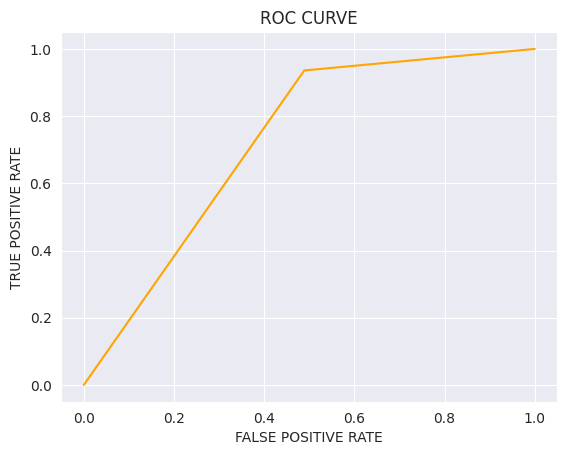

In [151]:
fpr, tpr, _ = roc_curve(y_test, gbc_pred)
plt.plot(fpr, tpr, color="orange")
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVE')

<h3>CATBOOST MODEL</h3>

In [152]:
from catboost import CatBoostClassifier

In [153]:
cat = CatBoostClassifier()

In [154]:
cat.fit(X_train, y_train)

Learning rate set to 0.007604
0:	learn: 0.6887807	total: 50.9ms	remaining: 50.9s
1:	learn: 0.6849143	total: 54.7ms	remaining: 27.3s
2:	learn: 0.6804981	total: 57.9ms	remaining: 19.2s
3:	learn: 0.6761276	total: 61.5ms	remaining: 15.3s
4:	learn: 0.6719913	total: 64.1ms	remaining: 12.8s
5:	learn: 0.6682041	total: 66.1ms	remaining: 11s
6:	learn: 0.6641391	total: 68.8ms	remaining: 9.76s
7:	learn: 0.6603645	total: 71.3ms	remaining: 8.84s
8:	learn: 0.6564167	total: 74.3ms	remaining: 8.18s
9:	learn: 0.6528727	total: 77.6ms	remaining: 7.69s
10:	learn: 0.6489193	total: 80.6ms	remaining: 7.25s
11:	learn: 0.6459268	total: 81.7ms	remaining: 6.73s
12:	learn: 0.6419930	total: 85.3ms	remaining: 6.48s
13:	learn: 0.6382582	total: 88.7ms	remaining: 6.25s
14:	learn: 0.6351105	total: 92.6ms	remaining: 6.08s
15:	learn: 0.6319816	total: 95.7ms	remaining: 5.89s
16:	learn: 0.6287317	total: 99ms	remaining: 5.73s
17:	learn: 0.6255921	total: 102ms	remaining: 5.56s
18:	learn: 0.6222225	total: 105ms	remaining: 5.42

In [155]:
cat_pred = cat.predict(X_test)
cat_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [156]:
print('ACCURACY SCORE : ', accuracy_score(y_test, cat_pred))
print("Training accuracy: ",cat.score(X_train,y_train))
print("Test accuracy : ",cat.score(X_test,y_test))
print('ROC AUC SCORE : ', roc_auc_score(y_test, cat_pred))
print('\n\n \n---------Confusion Matrix--------------')
print(confusion_matrix(y_test,cat_pred))
print('\n\n \n---------Classification Report--------------')
print(classification_report(y_test,cat_pred))

ACCURACY SCORE :  0.7967479674796748
Training accuracy:  0.9124236252545825
Test accuracy :  0.7967479674796748
ROC AUC SCORE :  0.726923076923077


 
---------Confusion Matrix--------------
[[21 24]
 [ 1 77]]


 
---------Classification Report--------------
              precision    recall  f1-score   support

           0       0.95      0.47      0.63        45
           1       0.76      0.99      0.86        78

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.74       123
weighted avg       0.83      0.80      0.77       123



In [157]:
cat_score=cross_val_score(cat,X,y,cv=5,scoring='accuracy')
print(cat_score)
print()
print("cross validation score for CATBOOST :",np.mean(cat_score))

Learning rate set to 0.007604
0:	learn: 0.6889380	total: 3.15ms	remaining: 3.15s
1:	learn: 0.6850466	total: 6.05ms	remaining: 3.02s
2:	learn: 0.6811368	total: 8.91ms	remaining: 2.96s
3:	learn: 0.6770194	total: 12.1ms	remaining: 3s
4:	learn: 0.6732747	total: 15.6ms	remaining: 3.1s
5:	learn: 0.6697451	total: 18.4ms	remaining: 3.04s
6:	learn: 0.6656501	total: 21.7ms	remaining: 3.08s
7:	learn: 0.6620253	total: 24.8ms	remaining: 3.08s
8:	learn: 0.6580572	total: 27.8ms	remaining: 3.06s
9:	learn: 0.6543423	total: 31.5ms	remaining: 3.12s
10:	learn: 0.6510128	total: 34.5ms	remaining: 3.1s
11:	learn: 0.6480474	total: 35.8ms	remaining: 2.94s
12:	learn: 0.6448331	total: 38.9ms	remaining: 2.96s
13:	learn: 0.6414598	total: 41.7ms	remaining: 2.94s
14:	learn: 0.6382892	total: 43.8ms	remaining: 2.88s
15:	learn: 0.6352174	total: 46.7ms	remaining: 2.87s
16:	learn: 0.6321668	total: 49.7ms	remaining: 2.87s
17:	learn: 0.6290981	total: 52.3ms	remaining: 2.85s
18:	learn: 0.6260680	total: 55.5ms	remaining: 2.8

Text(0.5, 1.0, 'ROC CURVE')

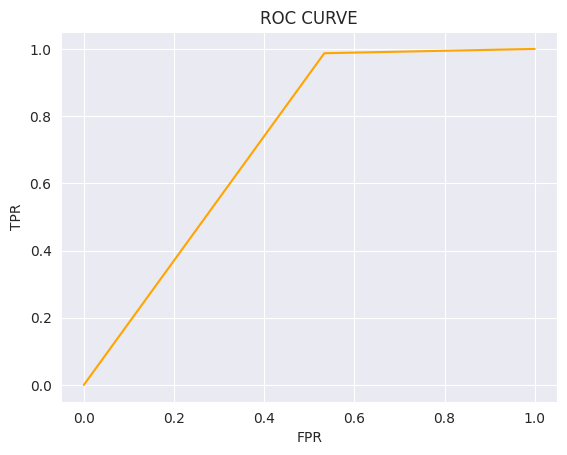

In [158]:
fpr, tpr, _ = roc_curve(y_test, cat_pred)
plt.plot(fpr, tpr, color="orange")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

<p style="font-size:140%;color:#47a0ff">After training and testing multiple machine learning algorithms, we found out that the best performing model was K Neighbors Classifier model. It gave an impressive accuracy of 0.81 or 81% accuracy and the roc auc score was also fantastic (0.75).</p>
<p style="font-size:140%;color:#aa55ff">Other models also performed really well and almost all other models apart from KNN gave 78% accuracy.</p>
<p style="font-size:140%;color:#2badb4">No, we will try to hyperparameter tune our knn model to see if we can improve even further.</p>

<h2>HYPERPARAMETER TUNING</h2>

In [159]:
from sklearn.model_selection import RandomizedSearchCV

In [160]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 17, 19, 21, 23, 25],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]                         
}

In [161]:
randomize = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, scoring='accuracy',n_jobs=-1,cv=5, verbose=4)

In [162]:
randomize.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11, 15, 17,
                                                        19, 21, 23, 25],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=4)

In [163]:
randomize.best_score_

0.7820861678004535

In [164]:
randomize.best_params_

{'weights': 'distance', 'p': 2, 'n_neighbors': 15}

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy',n_jobs=-1,cv=5, verbose=4)

In [167]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 15, 17, 19, 21, 23,
                                         25],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=4)

In [168]:
grid.best_score_

0.7902288188002474

In [169]:
grid.best_params_

{'n_neighbors': 17, 'p': 2, 'weights': 'uniform'}

<p style="font-size:120%;color:#797979">We can see that even after hypeparamter tuning techniques like GridSearch and RandomizedSearch we cannot improve the model. So, we will stop here and save the model using joblib library for further reference.</p>

<h2 style="color:#00a500">SAVING THE MODEL</h2>

In [170]:
import joblib

In [171]:
joblib.dump(knn, 'Loan_Application_Status_Prediction.pkl')

['Loan_Application_Status_Prediction.pkl']

<h1>DOCUMENTATION ⬇️<h1>

<p style="font-size:140%;color:#797979">We first imported the dataset using pandas dataframe and cleaned the dataset by filling null values with mode values and mean values as per the situation. Thn, we dropped the Loan ID column and split the data into training and testing data and then scaled the data using Standard Scaler.</p>
<br>
<p style="font-size:140%;color:#797979">We then trained multiple models and tested them and the results are given below.</p>
<br>
<p style="font-size:140%;color:#797979">The model chosen for this task is a supervised learning model suitable for binary classification tasks. The following models were evaluated:</p>

<p style="font-size:120%;color:#797979">
    <ul style="font-size:140%;color:#797979">
        <li>Logistic Regression</li>
        <li>Decision Tree</li>
        <li>Random Forest</li>
        <li>SVM</li>
        <li>KNN</li>
        <li>ADABOOST</li>
        <li>Gradient Boosting</li>
        <li>CatBoosting</li>
    </ul>
</p>
<p style="font-size:140%;color:#797979">The selected model KNN was trained using a training dataset split from the original dataset. Cross-validation was used to tune hyperparameters to optimize performance metrics such as accuracy, precision, recall, and F1-score.
</p>

<p style="font-size:140%;color:#797979">KNN MODEL RESULTS : </p>

<pre style="font-size:140%;color:#797979">⚫ Accuracy : 0.81 or 81%

⚫ Precision :
    ➡️ Macro : 0.87
    ➡️ Weighted : 0.84
    
⚫ Recall : 
     ➡️ Macro : 0.75
     ➡️ Weighted : 0.81
    
⚫ F1-score :
    ➡️ Macro : 0.77
    ➡️ Weighted : 0.80
    
⚫ ROC AUC : 0.75
</pre>

<p style="font-size:140%;color:#797979">The model created is a very robust and up to date model which is able to predict whether loan will be approved or rejected based on the applicant's details.</p>